In [1]:
import os
os.chdir("/home/mashrur/This-PC/Research/Attention-Free-KWS/Torch-KW-MLP")

In [3]:
from models.kwmlp import KW_MLP
import torch
import matplotlib.pyplot as plt
from torch import nn
import math

In [11]:
def update_temperature(step: int, max_steps: int, max_T: float, min_T: float):
    if step >= max_steps:
        return 1
    else:
        cos_val = math.cos((math.pi * (step % max_steps)) / max_steps)
        return max((max_T / 2) * (cos_val + 1), min_T)

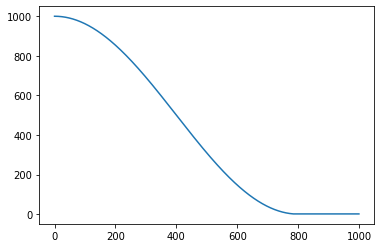

In [12]:
t = []
for i in range(1000):
    t.append(update_temperature(i, 800, 1000))

plt.plot(t)

In [9]:
def set_grad_state(model: nn.Module, state: bool) -> None:
    """Freezes or unfreezes model weights.

    Args:
        model (nn.Module): Model instance.
        state (bool): State for requires_grad.
    """
    for p in model.parameters():
        p.requires_grad = state

In [10]:
model = KW_MLP()

In [14]:
set_grad_state(model, False)

In [15]:
for p in model.parameters():
    print(p.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [12]:
ckpt = torch.load("data/kwmlp_7_10_21.pth", map_location="cpu")

In [13]:
model.load_state_dict(ckpt["model_state_dict"])

<All keys matched successfully>

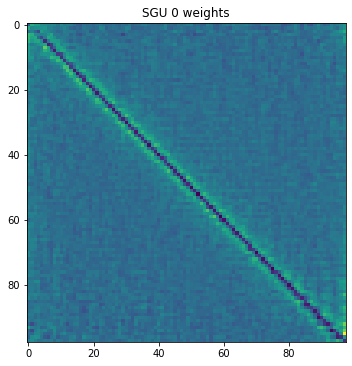

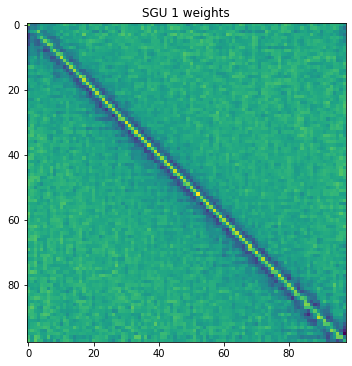

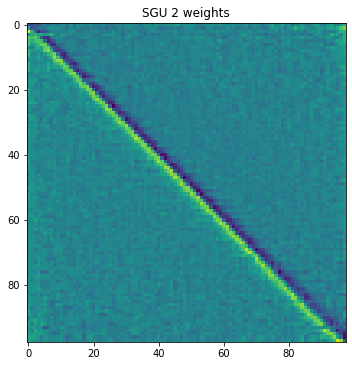

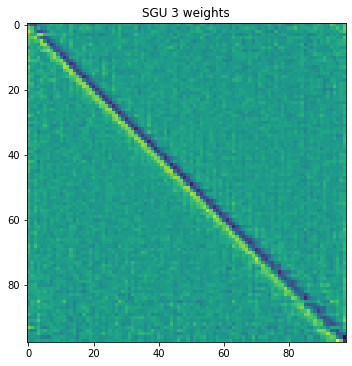

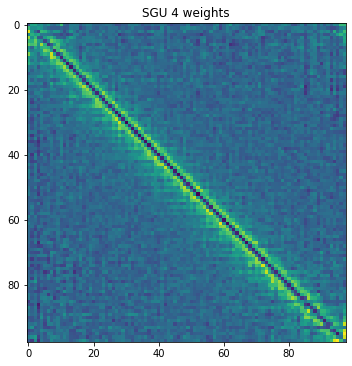

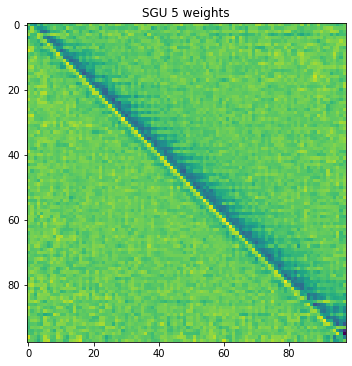

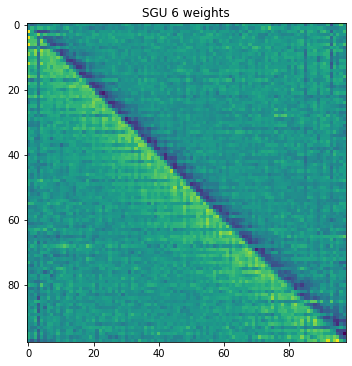

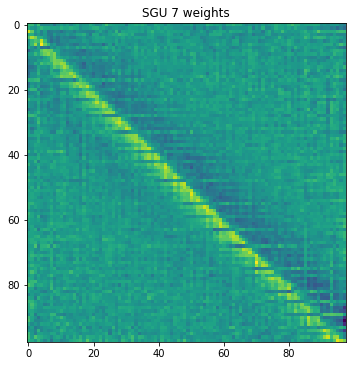

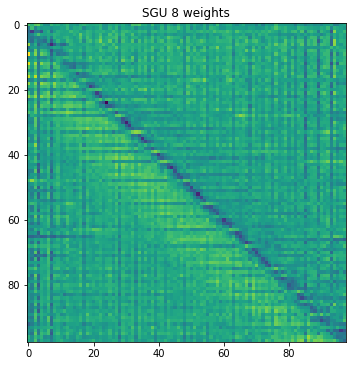

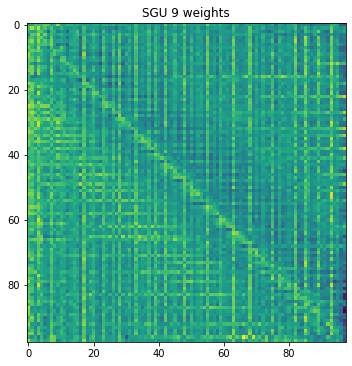

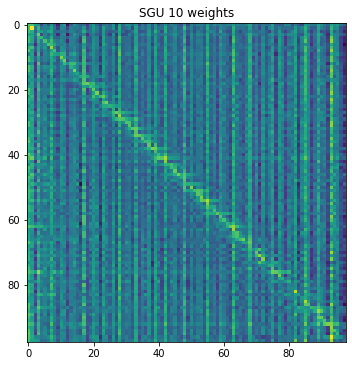

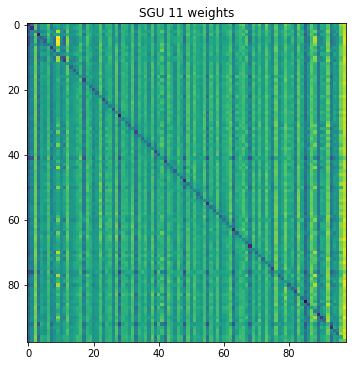

In [32]:
for i in range(12):
    weights = model.layers[i].fn.fn.sgu.proj.weight.data.squeeze().numpy()


    plt.figure(figsize=(5, 5))
    plt.imshow(weights)
    plt.savefig(f"SGU_{i}.jpg")
    plt.tight_layout()
    plt.title(f"SGU {i} weights")
    plt.show()

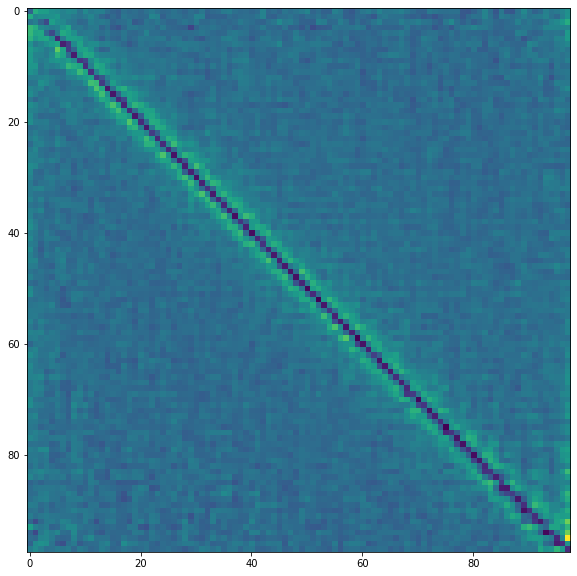